# The Robot World

A robot, much like you, perceives the world through its "senses." For example, self-driving cars use video, radar, and Lidar, to observe the world around them. As cars gather data, they build up a 3D world of observations that tells the car where it is, where other objects (like trees, pedestrians, and other vehicles) are, and where it should be going! 

In this section, we'll be working with first a 1D then a 2D representation of the world for simplicity, and because two dimensions are often all you'll need to solve a certain problem. 
* You'll be given a set of quizzes to solve to build up your understanding of robot localization. 
* Try your best to solve these quizzes and consult the solution if you get stuck or want to confirm your answer.

*The solution will always be in either 1. a notebook which can be accessed in the `jupyter` directory in the top-left or 2. the video that comes after a quiz.* 

<img src="images/lidar.png" width="50%" height="50%">


These grid representations of the environment are known as **discrete** representations. Discrete just means a limited number of places a robot can be (ex. in one grid cell). That's because robots, and autonomous vehicles like self-driving cars, use maps to figure out where they are, and maps lend themselves to being divided up into grids and sections.

You'll see **continuous** probability distributions when locating objects that are moving around the robot. Continuous means that these objects can be anywhere around the robot and their movement is smooth.

### Exercise Repository

Most notebooks in this localization lesson can be found in [this Github repo](https://github.com/udacity/CVND_Localization_Exercises).

So, let's start with the 1D case.

# 로봇 세계

로봇은 여러분과 마찬가지로 "감각"을 통해 세상을 인식합니다. 예를 들어, 자율 주행 자동차는 비디오, 레이더, 라이더를 사용하여 주변 세계를 관찰합니다. 자동차가 데이터를 수집하면서 자동차의 위치, 다른 물체(나무, 보행자, 다른 차량 등)가 있는 위치, 가야 할 위치를 알려주는 3D 관찰 세계를 구축합니다!

이 섹션에서는 단순화를 위해 먼저 1D로 표현한 다음 2D로 표현한 세계를 작업할 것입니다. 그리고 특정 문제를 해결하는 데 종종 2차원만 있으면 되기 때문입니다.
* 로봇 위치 파악에 대한 이해를 높이기 위해 풀어야 할 퀴즈 세트가 제공됩니다.
* 이 퀴즈를 최선을 다해 풀고 막히거나 답을 확인하고 싶은 경우 솔루션을 참조하세요.

*해결책은 항상 1. 왼쪽 상단의 `jupyter` 디렉토리에서 액세스할 수 있는 노트북 또는 2. 퀴즈 다음에 나오는 비디오에 있습니다.*

<img src="images/lidar.png" width="50%" height="50%">

환경의 이러한 그리드 표현은 **불연속** 표현이라고 합니다. 불연속은 로봇이 있을 수 있는 장소의 수가 제한되어 있음을 의미합니다(예: 하나의 그리드 셀). 로봇과 자율 주행 자동차와 같은 자율 주행 차량은 지도를 사용하여 위치를 파악하고 지도는 그리드와 섹션으로 구분하는 데 적합하기 때문입니다.

로봇 주변을 움직이는 물체를 찾을 때 **연속** 확률 분포가 표시됩니다. 연속은 이러한 물체가 로봇 주변 어디에나 있을 수 있으며 움직임이 매끄럽다는 것을 의미합니다.

### 연습 저장소

이 로컬라이제이션 레슨의 대부분 노트북은 [이 Github 저장소](https://github.com/udacity/CVND_Localization_Exercises)에서 찾을 수 있습니다.

그럼, 1D 케이스부터 시작해 봅시다.

### Robot World 1-D

First, imagine you have a robot living in a 1-D world. You can think of a 1D world as a one-lane road. 

<img src="images/road_1.png" width="50%" height="50%">

We can treat this road as an array, and break it up into grid cells for a robot to understand. In this case, the road is a 1D grid with 5 different spaces. The robot can only move forwards or backwards. If the robot falls off the grid, it will loop back around to the other side (this is known as a cyclic world).

<img src="images/numbered_grid.png" width="50%" height="50%">

### Uniform Distribution

The robot has a map so that it knows there are only 5 spaces in this 1D world. However, it hasn't sensed anything or moved. For a length of 5 cells (a list of 5 values), what is the probability distribution, `p`, that the robot is in any one of these locations?

Since the robot does not know where it is at first, the probability of being in any space is the same! This is a probability distribution and so the sum of all these probabilities should be equal to 1, so `1/5 spaces = 0.2`. A distribution in which all the probabilities are the same (and we have maximum uncertainty) is called a **uniform distribution**.

### 로봇 세계 1차원

먼저, 1차원 세계에 사는 로봇이 있다고 상상해 보세요. 1차원 세계는 1차선 도로라고 생각할 수 있습니다.

<img src="images/road_1.png" width="50%" height="50%">

이 도로를 배열로 취급하고 로봇이 이해할 수 있도록 그리드 셀로 나눌 수 있습니다. 이 경우 도로는 5개의 다른 공간이 있는 1차원 그리드입니다. 로봇은 앞으로 또는 뒤로만 이동할 수 있습니다. 로봇이 그리드에서 떨어지면 반대쪽으로 돌아갑니다(이를 순환 세계라고 합니다).

<img src="images/numbered_grid.png" width="50%" height="50%">

### 균일 분포

로봇에는 지도가 있어서 이 1차원 세계에 5개의 공간만 있다는 것을 알고 있습니다. 그러나 아무것도 감지하거나 움직이지 않았습니다. 5개의 셀(5개의 값 목록) 길이에 대해 로봇이 이러한 위치 중 하나에 있을 확률 분포 `p`는 무엇입니까?

로봇은 처음에는 어디에 있는지 모르기 때문에 모든 공간에 있을 확률은 같습니다! 이것은 확률 분포이므로 이러한 모든 확률의 합은 1과 같아야 하므로 `1/5 공간 = 0.2`입니다. 모든 확률이 동일한(그리고 최대 불확실성이 있는) 분포를 **균일 분포**라고 합니다.

In [1]:
# importing resources
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# uniform distribution for 5 grid cells
# we use "p" to represent probability
p = [0.2, 0.2, 0.2, 0.2, 0.2]
print(p)


[0.2, 0.2, 0.2, 0.2, 0.2]


I'll also include a helper function for visualizing this distribution. The below function, `display_map` will output a bar chart showing the probability that a robot is in each grid space. The y-axis has a range of 0 to 1 for the range of probabilities. For a uniform distribution, this will look like a flat line. You can choose the width of each bar to be <= 1 should you want to space these out. 

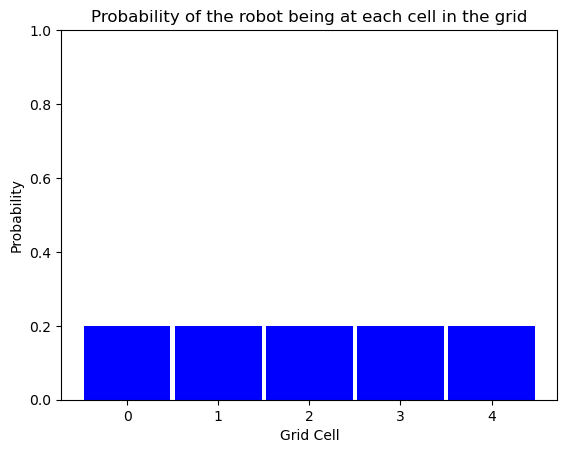

In [3]:
def display_map(grid, bar_width=1):
    if(len(grid) > 0):
        x_labels = range(len(grid))
        plt.bar(x_labels, height=grid, width=0.95, color='b')
        plt.xlabel('Grid Cell')
        plt.ylabel('Probability')
        plt.ylim(0, 1) # range of 0-1 for probability values 
        plt.title('Probability of the robot being at each cell in the grid')
        plt.xticks(np.arange(min(x_labels), max(x_labels)+1, 1))
        plt.show()
    else:
        print('Grid is empty')

# call function on grid, p, from before
display_map(p)

Now, what about if the world was 8 grid cells in length instead of 5?

### QUIZ: Write a function that takes in the number of spaces in the robot's world (in this case 8), and returns the initial probability distribution `p` that the robot is in each space. 

This function should store the probabilities in a list. So in this example, there would be a list with 8 probabilities.

이제, 만약 세계가 5개가 아닌 8개의 격자 셀 길이라면 어떨까요?

### 퀴즈: 로봇 세계의 공간 수(이 경우 8개)를 입력받고 로봇이 각 공간에 있는 초기 확률 분포 `p`를 반환하는 함수를 작성하세요.

이 함수는 확률을 목록에 저장해야 합니다. 따라서 이 예에서는 8개의 확률이 있는 목록이 있습니다.

In [17]:
# ex. initialize_robot(5) = [0.2, 0.2, 0.2, 0.2, 0.2]
from more_itertools import run_length


def initialize_robot(grid_length):
    ''' Takes in a grid length and returns 
       a uniform distribution of location probabilities'''\
       
    p = []

    default = 1 / grid_length
    for i in range(grid_length):
        p.append(default)

    return p


[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]


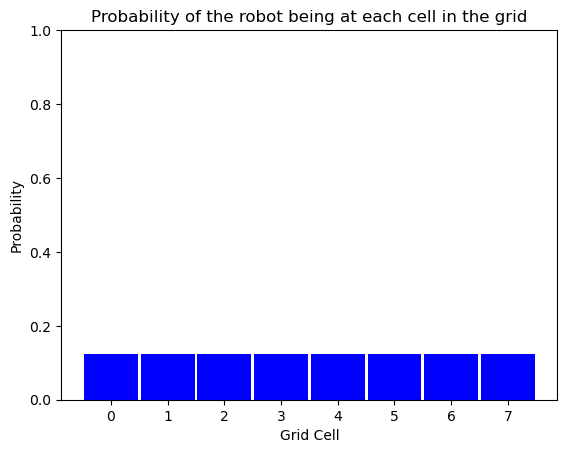

In [18]:
p = initialize_robot(8)
print(p)
display_map(p)

Now that you know how a robot initially sees a simple 1D world, let's learn about how it can locate itself by moving around and sensing it's environment!

이제 로봇이 처음에는 단순한 1차원 세계를 어떻게 보는지 알았으니, 이제 로봇이 돌아다니고 주변 환경을 감지하여 자신의 위치를 ​​알아내는 방법에 대해 알아보겠습니다!

### Probability After Sense

Then the robot senses that it is in a red cell, and updates its probabilities. As per our example:

* The probability that it is sensing the correct color is `pHit = 0.6`.
* The probability that it is sensing the incorrect color (in this case: seeing red but *actually* in a green cell) is `pMiss = 0.2`

<img src='images/robot_sensing.png' width=50% height=50% />

#### Next, we write code that outputs a new grid, `p`, after multiplying each entry by pHit or pMiss at the appropriate places. 

Remember that the red cells (cell 1 and 2) are "hits" and the other green cells are "misses."

Note that you may see values that are not exact due to how machines imperfectly represent floating points.

### 감지 후 확률

그런 다음 로봇은 자신이 빨간색 셀에 있다는 것을 감지하고 확률을 업데이트합니다. 우리의 예에 따르면:

* 올바른 색상을 감지할 확률은 `pHit = 0.6`입니다.
* 잘못된 색상을 감지할 확률(이 경우: 빨간색을 보지만 *실제로는* 녹색 셀에 있음)은 `pMiss = 0.2`입니다.

<img src='images/robot_sensing.png' width=50% height=50% />

#### 다음으로, 각 항목에 적절한 위치에서 pHit 또는 pMiss를 곱한 후 새 그리드 `p`를 출력하는 코드를 작성합니다.

빨간색 셀(셀 1과 2)은 "적중"이고 다른 녹색 셀은 "실패"라는 점을 기억하세요.

기계가 부동 소수점을 불완전하게 표현하는 방식으로 인해 정확하지 않은 값이 표시될 수 있습니다.

[0.04000000000000001, 0.12, 0.12, 0.04000000000000001, 0.04000000000000001]


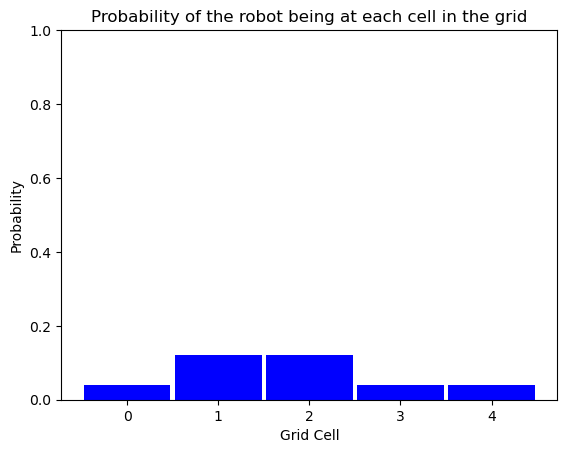

In [19]:
# given initial variables
p = initialize_robot(5)
pHit  = 0.6
pMiss = 0.2

# Creates a new grid, with modified probabilities, after sensing
# All values are calculated by a product of 1. the sensing probability for a color (pHit for red)
# and 2. the current probability of a robot being in that location p[i]; all equal to 0.2 at first.
p[0] = p[0]*pMiss
p[1] = p[1]*pHit
p[2] = p[2]*pHit
p[3] = p[3]*pMiss
p[4] = p[4]*pMiss

print(p)
display_map(p)

You should see that the red grid cells (1 and 2) have a higher probability than the green cells. One thing that may look strange is how low these probability bars are, and you may have noticed that these don't accurately represent a probability distribution because the components of this list do not add up to 1!

### QUIZ: Compute the sum of all of these probabilities.

What do these values add up to and how do you think we can turn this into a probability distribution whose components do add up to 1? 

In the next code cell, write code to sum up the values in the new world, `p`.

빨간색 격자 셀(1과 2)이 녹색 셀보다 확률이 더 높다는 것을 알 수 있습니다. 이상하게 보일 수 있는 한 가지는 이러한 확률 막대가 얼마나 낮은지이며, 이 목록의 구성 요소가 1이 되지 않기 때문에 이것이 확률 분포를 정확하게 나타내지 않는다는 것을 알아차렸을 수 있습니다!

### 퀴즈: 이 모든 확률의 합을 계산합니다.

이 값들은 얼마가 되며, 이것을 구성 요소가 1이 되는 확률 분포로 어떻게 바꿀 수 있다고 생각하십니까?

다음 코드 셀에서 새 세계 `p`의 값을 합하는 코드를 작성합니다.

In [20]:
# What is the sum of all the values in p?

## TODO: add up all the values in the list of location probabilities to determine the answer
probabilities = [p[0], p[1], p[2], p[3], p[4]]
sum = 0
for i in range(len(probabilities)):
    sum += probabilities[i]
print("Sum:",sum)

Sum: 0.3600000000000001


# Sense Function

In this notebook, let's go over the steps a robot takes to help localize itself from an initial, uniform distribution to sensing and updating that distribution.

You know these steps well, and this time, you're tasked with writing a function `sense` that encompasses this behavior. 

1. The robot starts off knowing nothing; the robot is equally likely to be anywhere and so `p` is a uniform distribution.
2. Then the robot senses a grid color: red or green, and updates this distribution `p` according to the values of pHit and pMiss.

* The probability that it is sensing the color correctly is `pHit = 0.6`.
* The probability that it is sensing the wrong color is `pMiss = 0.2`

<img src='images/robot_sensing.png' width=50% height=50% />

# 감지 함수

이 노트북에서는 로봇이 초기 균일 분포에서 해당 분포를 감지하고 업데이트하는 데 도움이 되는 단계를 살펴보겠습니다.

이러한 단계를 잘 알고 있으며 이번에는 이러한 동작을 포함하는 함수 `sense`를 작성해야 합니다.

1. 로봇은 아무것도 모른 채 시작합니다. 로봇은 어디에 있든 동일한 확률로 `p`는 균일 분포입니다.
2. 그런 다음 로봇은 격자 색상(빨간색 또는 녹색)을 감지하고 pHit 및 pMiss의 값에 따라 이 분포 `p`를 업데이트합니다.

* 색상을 올바르게 감지할 확률은 `pHit = 0.6`입니다.
* 잘못된 색상을 감지할 확률은 `pMiss = 0.2`입니다.

<img src='images/robot_sensing.png' width=50% height=50% />

### QUIZ: Complete the sense function so that this outputs an unnormalized distribution, `p`, after sensing. 

Use the previous exercise as a starting point. `q = [0.04, 0.12, 0.12, 0.04, 0.04]` should be exactly the distribution you get when the sensor measurement `Z= 'red'`. 

This complete function should also output the correct `q` for `Z= 'green'`.

Note that `pHit` refers to the probability that the robot correctly senses the color of the square it is on, so if a robot senses red *and* is on a red square, we'll multiply the current location probability (0.2) with pHit. Same goes for if a robot senses green *and* is on a green square.

### 퀴즈: 감지 후 정규화되지 않은 분포 `p`를 출력하도록 감지 함수를 완성하세요.

이전 연습을 시작점으로 사용하세요. `q = [0.04, 0.12, 0.12, 0.04, 0.04]`는 센서 측정값이 `Z= 'red'`일 때 얻는 분포와 정확히 같아야 합니다.

이 완전한 함수는 또한 `Z= 'green'`에 대한 올바른 `q`를 출력해야 합니다.

`pHit`는 로봇이 있는 사각형의 색상을 올바르게 감지할 확률을 나타냅니다. 따라서 로봇이 빨간색을 감지하고 *그리고* 빨간색 사각형에 있는 경우 현재 위치 확률(0.2)에 pHit을 곱합니다. 로봇이 녹색을 감지하고 *그리고* 녹색 사각형에 있는 경우에도 마찬가지입니다.

[0.04000000000000001, 0.12, 0.12, 0.04000000000000001, 0.04000000000000001]


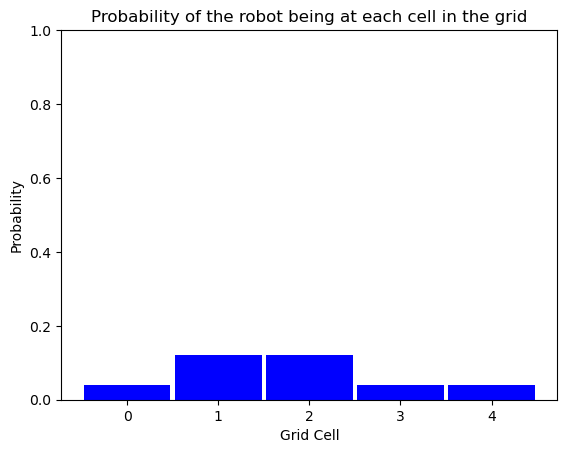

In [21]:
# given initial variables
p=[0.2, 0.2, 0.2, 0.2, 0.2]
# the color of each grid cell in the 1D world
world=['green', 'red', 'red', 'green', 'green']
# Z, the sensor reading ('red' or 'green')
Z = 'red'
pHit = 0.6
pMiss = 0.2

## Complete this function
def sense(p, Z):
    ''' Takes in a current probability distribution, p, and a sensor reading, Z.
        Returns an unnormalized distribution after the sensor measurement has been made, q.
        This should be accurate whether Z is 'red' or 'green'. '''
    q=[]
    for i in range(len(p)):

        if world[i] == Z:
            q.append(p[i] * pHit)
        else:
            q.append(p[i] * pMiss)
    
    return q

q = sense(p,Z)
print(q)
display_map(q, 0.95)

# Normalized Sense Function

In this notebook, let's go over the steps a robot takes to help localize itself from an initial, uniform distribution to sensing and updating that distribution and finally normalizing that distribution.

1. The robot starts off knowing nothing; the robot is equally likely to be anywhere and so `p` is a uniform distribution.
2. Then the robot senses a grid color: red or green, and updates this distribution `p` according to the values of pHit and pMiss.
3. **We normalize `p` such that its components sum to 1.**

<img src='images/robot_sensing.png' width=50% height=50% />

# 정규화된 감지 함수

이 노트북에서는 로봇이 초기 균일 분포에서 자신을 지역화하는 데 도움이 되는 단계를 살펴보고, 분포를 감지하고 업데이트하고 마지막으로 분포를 정규화합니다.

1. 로봇은 아무것도 모르는 상태에서 시작합니다. 로봇은 어디에나 있을 가능성이 동일하므로 `p`는 균일 분포입니다.
2. 그런 다음 로봇은 격자 색상(빨간색 또는 녹색)을 감지하고 pHit 및 pMiss의 값에 따라 이 분포 `p`를 업데이트합니다.
3. **`p`를 정규화하여 구성 요소의 합이 1이 되도록 합니다.**

<img src='images/robot_sensing.png' width=50% height=50% />

### QUIZ: Modify your code so that it normalizes the output for the sense function. 

This means that the entries in `q` should sum to one.

Note that `pHit` refers to the probability that the robot correctly senses the color of the square it is on, so if a robot senses red *and* is on a red square, we'll multiply the current location probability (0.2) with pHit. Same goes for if a robot senses green *and* is on a green square.

### 퀴즈: 코드를 수정하여 감지 함수의 출력을 정규화하세요.

즉, `q`의 항목은 합이 1이어야 합니다.

`pHit`는 로봇이 있는 사각형의 색상을 올바르게 감지할 확률을 나타냅니다. 따라서 로봇이 빨간색을 감지하고 *그리고* 빨간색 사각형에 있는 경우 현재 위치 확률(0.2)에 pHit을 곱합니다. 로봇이 녹색을 감지하고 *그리고* 녹색 사각형에 있는 경우에도 마찬가지입니다.

In [ ]:
# given initial variables
p=[0.2, 0.2, 0.2, 0.2, 0.2]
# the color of each grid cell in the 1D world
world=['green', 'red', 'red', 'green', 'green']
# Z, the sensor reading ('red' or 'green')
Z = 'red'
pHit = 0.6
pMiss = 0.2

## Complete this function
def sense(p, Z):
    ''' Takes in a current probability distribution, p, and a sensor reading, Z.
        Returns a *normalized* distribution after the sensor measurement has been made, q.
        This should be accurate whether Z is 'red' or 'green'. '''
    
    q=[]
    
    ##TODO: normalize q
    

    return q

q = sense(p,Z)
print(q)
display_map(q, 0.95)

# Multiple Measurements

In this notebook, let's go over the steps a robot takes to help localize itself from an initial, uniform distribution to sensing and updating that distribution and finally normalizing that distribution.

1. The robot starts off knowing nothing; the robot is equally likely to be anywhere and so `p` is a uniform distribution.
2. Then the robot senses a grid color: red or green, and updates this distribution `p` according to the values of pHit and pMiss.
3. We normalize `p` such that its components sum to 1.
4. **We repeat steps 2 and 3 for however many measurements are taken**

<img src='images/robot_sensing.png' width=50% height=50% />

# 여러 측정

이 노트북에서는 로봇이 초기 균일 분포에서 자신을 지역화하는 데 도움이 되는 단계를 살펴보고, 분포를 감지하고 업데이트하고 마지막으로 분포를 정규화합니다.

1. 로봇은 아무것도 모르는 상태에서 시작합니다. 로봇은 어디에나 있을 가능성이 동일하므로 `p`는 균일 분포입니다.
2. 그런 다음 로봇은 격자 색상(빨간색 또는 녹색)을 감지하고 pHit 및 pMiss의 값에 따라 이 분포 `p`를 업데이트합니다.
3. `p`를 정규화하여 구성 요소의 합이 1이 되도록 합니다.
4. **측정 횟수에 따라 2단계와 3단계를 반복합니다.**

<img src='images/robot_sensing.png' width=50% height=50% />

### QUIZ: Measure Twice

Below is the normalized sense function, add code that can loop over muliple measurements, now in a *list* `measurements`. Add to this code so that it updates the probability twice and gives the posterior distribution after both measurements are incorporated. 

Make sure that your code allows for any sequence of measurements whether two measurements or more have been taken.

### 퀴즈: 두 번 측정

아래는 정규화된 의미 함수입니다. 여러 측정을 반복할 수 있는 코드를 추가하세요. 이제 *목록* `measurements`에 있습니다. 이 코드에 확률을 두 번 업데이트하고 두 측정이 통합된 후 사후 분포를 제공하도록 추가합니다.

두 번 이상의 측정이 수행되었는지 여부에 관계없이 코드에서 모든 측정 시퀀스를 허용하는지 확인합니다.

In [ ]:
# given initial variables
p=[0.2, 0.2, 0.2, 0.2, 0.2]
# the color of each grid cell in the 1D world
world=['green', 'red', 'red', 'green', 'green']

# measurements, now a *list* of sensor readings ('red' or 'green')
measurements = ['red', 'green']
pHit = 0.6
pMiss = 0.2

# sense function
def sense(p, Z):
    ''' Takes in a current probability distribution, p, and a sensor reading, Z.
        Returns a *normalized* distribution after the sensor measurement has been made, q.
        This should be accurate whether Z is 'red' or 'green'. '''
    q=[]
    # loop through all grid cells
    for i in range(len(p)):
        # check if the sensor reading is equal to the color of the grid cell
        # if so, hit = 1
        # if not, hit = 0
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
        
    # sum up all the components
    s = sum(q)
    # divide all elements of q by the sum to normalize
    for i in range(len(p)):
        q[i] = q[i] / s
    return q

## TODO: Add your code for accounting for 2 motion measurements, here

## Grab and print out the resulting distribution, p


print(p)
display_map(p, 0.95)

# Move Function

Now that you know how a robot uses sensor measurements to update its idea of its own location, let's see how we can incorporate motion into this location. In this notebook, let's go over the steps a robot takes to help localize itself from an initial, uniform distribution to sensing, moving and updating that distribution.

We include the `sense` function that you've seen, which updates an initial distribution based on whether a robot senses a grid color: red or green. 

Next, you're tasked with writing a function `move` that incorporates motion into the distribution. As seen below, **one motion `U= 1` to the right, causes all values in a distribution to shift one grid cell to the right.**

<img src='images/motion_1.png' width=50% height=50% />

# Move 함수

이제 로봇이 센서 측정을 사용하여 자신의 위치에 대한 아이디어를 업데이트하는 방법을 알았으니, 이 위치에 동작을 통합하는 방법을 살펴보겠습니다. 이 노트북에서는 로봇이 초기의 균일한 분포에서 감지, 이동 및 해당 분포를 업데이트하는 데 도움이 되는 단계를 살펴보겠습니다.

로봇이 격자 색상(빨간색 또는 녹색)을 감지하는지 여부에 따라 초기 분포를 업데이트하는 `sense` 함수를 포함합니다.

다음으로, 분포에 동작을 통합하는 함수 `move`를 작성해야 합니다. 아래에서 볼 수 있듯이 오른쪽으로 **한 번의 동작 `U= 1`은 분포의 모든 값이 한 격자 셀을 오른쪽으로 이동하게 합니다.**

<img src='images/motion_1.png' width=50% height=50% />

In [22]:
# given initial variables
p=[0, 1, 0, 0, 0]
# the color of each grid cell in the 1D world
world=['green', 'red', 'red', 'green', 'green']
# Z, the sensor reading ('red' or 'green')
Z = 'red'
pHit = 0.6
pMiss = 0.2

# You are given the complete sense function
def sense(p, Z):
    ''' Takes in a current probability distribution, p, and a sensor reading, Z.
        Returns a *normalized* distribution after the sensor measurement has been made, q.
        This should be accurate whether Z is 'red' or 'green'. '''
    q=[]
    # loop through all grid cells
    for i in range(len(p)):
        # check if the sensor reading is equal to the color of the grid cell
        # if so, hit = 1
        # if not, hit = 0
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
        
    # sum up all the components
    s = sum(q)
    # divide all elements of q by the sum to normalize
    for i in range(len(p)):
        q[i] = q[i] / s
    return q

# Commented out code for measurements
# for k in range(len(measurements)):
#     p = sense(p, measurements)


### QUIZ: Program a function that returns a new distribution q, shifted to the right by the motion (U) units. 

This function should shift a distribution with the motion, U. Keep in mind that this world is cyclic and that if U=0, q should be the same as the given p. You should see all the values in `p` are moved to the right by 1, for U=1.

### 퀴즈: 새로운 분포 q를 반환하는 함수를 프로그래밍하세요. q는 운동(U) 단위로 오른쪽으로 이동합니다.

이 함수는 분포를 운동 U로 이동해야 합니다. 이 세계는 순환적이며 U=0이면 q는 주어진 p와 같아야 한다는 점을 명심하세요. `p`의 모든 값이 U=1인 경우 오른쪽으로 1만큼 이동해야 합니다.

[0, 1, 0, 0, 0]


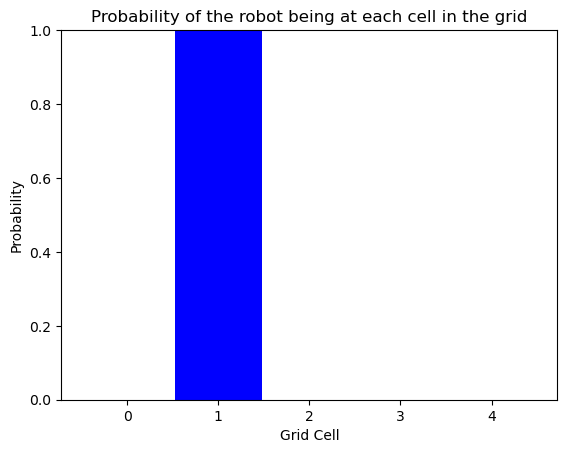

In [34]:

## TODO: Complete this move function so that it shifts a probability distribution, p
## by a given motion, U
def move(p, U):
    q=[]
    # Your code here
    for i in range(len(p)):
        q.append(p[(i-U) % len(p)])
    
    return q

p = move(p,1)
print(p)
display_map(p, 0.95)

# Inexact Move Function

Let's see how we can incorporate **uncertain** motion into our motion update. We include the `sense` function that you've seen, which updates an initial distribution based on whether a robot senses a grid color: red or green. 

Next, you're tasked with modifying the `move` function so that it incorporates uncertainty in motion.

<img src='images/uncertain_motion.png' width=50% height=50% />

# 부정확한 움직임 함수

**불확실한** 움직임을 동작 업데이트에 어떻게 통합할 수 있는지 살펴보겠습니다. 로봇이 격자 색상(빨간색 또는 녹색)을 감지하는지 여부에 따라 초기 분포를 업데이트하는, 여러분이 본 `sense` 함수를 포함합니다.

다음으로, `move` 함수를 수정하여 동작에 불확실성을 통합하는 작업을 맡게 됩니다.

<img src='images/uncertain_motion.png' width=50% height=50% />

In [42]:
# given initial variables
p=[0, 1, 0, 0, 0]
# the color of each grid cell in the 1D world
world=['green', 'red', 'red', 'green', 'green']
# Z, the sensor reading ('red' or 'green')
Z = 'red'
pHit = 0.6
pMiss = 0.2

# You are given the complete sense function
def sense(p, Z):
    ''' Takes in a current probability distribution, p, and a sensor reading, Z.
        Returns a *normalized* distribution after the sensor measurement has been made, q.
        This should be accurate whether Z is 'red' or 'green'. '''
    q=[]
    # loop through all grid cells
    for i in range(len(p)):
        # check if the sensor reading is equal to the color of the grid cell
        # if so, hit = 1
        # if not, hit = 0
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
        
    # sum up all the components
    s = sum(q)
    # divide all elements of q by the sum to normalize
    for i in range(len(p)):
        q[i] = q[i] / s
    return q

# Commented out code for measurements
# for k in range(len(measurements)):
#     p = sense(p, measurements)


### QUIZ: Modify the move function to accommodate the added probabilities of overshooting or undershooting the intended destination.

This function should shift a distribution with the motion, U, with some probability of under/overshooting. For the given, initial `p`, you should see the result for U = 1 and incorporated uncertainties: `[0.0, 0.1, 0.8, 0.1, 0.0]`.

### 퀴즈: 이동 함수를 수정하여 의도한 목적지를 초과하거나 초과하지 않을 추가 확률을 수용합니다.

이 함수는 일부 초과/미달 확률로 모션 U에 따라 분포를 이동해야 합니다. 주어진 초기 `p`에 대해 U = 1과 통합된 불확실성에 대한 결과를 볼 수 있습니다: `[0.0, 0.1, 0.8, 0.1, 0.0]`.

[0.20009809242174395, 0.19974319039155727, 0.19974319039155727, 0.20009809242174392, 0.20031743437340116]


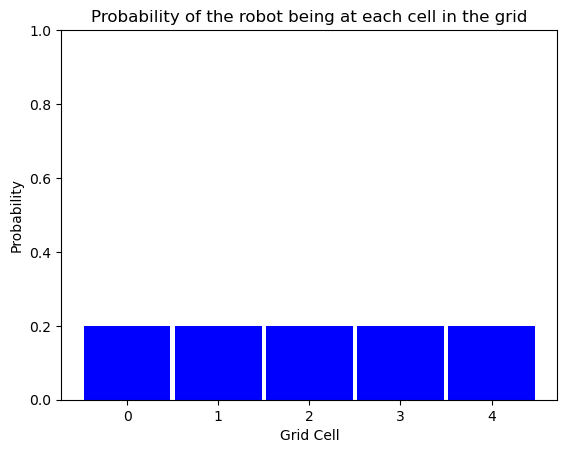

In [95]:
## TODO: Modify the move function to accommodate the added robabilities of overshooting or undershooting 
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

# Complete the move function
def move(p, U):
    q=[]
    # iterate through all values in p
    for i in range(len(p)):
        ## TODO: Modify this distribution code to incorporate values 
        s = pExact * p[(i-U) % len(p)]
        s = s + pOvershoot * p[(i-U-1) % len(p)]
        s = s + pUndershoot * p[(i-U+1) % len(p)]
        
        # append the correct, modified value of p to q
        q.append(s)
    return q

## TODO: try this for U = 2 and see the result
p = move(p,1)
print(p)
display_map(p,0.95)

### QUIZ: Write code that moves 1000 times and then prints the resulting probability distribution.

You are given the initial variables and a complete `move` function (that incorporates uncertainty), below.

### 퀴즈: 1000번 이동한 다음 결과 확률 분포를 출력하는 코드를 작성하세요.

아래에 초기 변수와 완전한 `move` 함수(불확실성을 통합)가 제공됩니다.

In [ ]:
# given initial variables
p=[0, 1, 0, 0, 0]
# the color of each grid cell in the 1D world
world=['green', 'red', 'red', 'green', 'green']
# Z, the sensor reading ('red' or 'green')
Z = 'red'
pHit = 0.6
pMiss = 0.2

pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

# Complete the move function
def move(p, U):
    q=[]
    # iterate through all values in p
    for i in range(len(p)):
        # use the modulo operator to find the new location for a p value
        # this finds an index that is shifted by the correct amount
        index = (i-U) % len(p)
        nextIndex = (index+1) % len(p)
        prevIndex = (index-1) % len(p)
        s = pExact * p[index]
        s = s + pOvershoot  * p[nextIndex]
        s = s + pUndershoot * p[prevIndex]
        # append the correct, modified value of p to q
        q.append(s)
    return q

# Here is code for moving twice
for i in range(2):
    p = move(p, 1)
print(p)
display_map(p)

In [ ]:
## TODO: Write code for moving 1000 times


# Sense and Move

In this notebook, let's put all of what we've learned together and see what happens to an initial probability distribution as a robot goes trough cycles of sensing then moving then sensing then moving, and so on! Recall that each time a robot senses (in this case a red or green color)it gains information about its environment, and everytime it moves, it loses some information due to motion uncertainty.


<img src='images/sense_move.png' width=50% height=50% />

# 감지하고 움직이기

이 노트북에서 우리가 배운 모든 것을 모아서 로봇이 감지, 이동, 감지, 이동 등의 주기를 거치면서 초기 확률 분포에 어떤 일이 일어나는지 살펴보겠습니다! 로봇이 (이 경우 빨간색이나 초록색) 감지할 때마다 환경에 대한 정보를 얻고, 움직일 때마다 동작 불확실성으로 인해 일부 정보를 잃는다는 점을 기억하세요.

<img src='images/sense_move.png' width=50% height=50% />

### QUIZ: Given the list motions=[1,1], compute the posterior distribution if the robot first senses red, then moves right one, then senses green, then moves right again, starting with a uniform prior distribution, `p`.

`motions=[1,1]` mean that the robot moves right one cell and then right again. You are given the initial variables and the complete `sense` and `move` function, below.

### 퀴즈: 목록 motions=[1,1]이 주어졌을 때, 로봇이 먼저 빨간색을 감지한 다음 오른쪽으로 한 칸 이동하고, 녹색을 감지한 다음 다시 오른쪽으로 이동하는 경우 사후 분포를 계산합니다. 이때 균일한 사전 분포 `p`로 시작합니다.

`motions=[1,1]`은 로봇이 오른쪽으로 한 셀 이동한 다음 다시 오른쪽으로 이동한다는 것을 의미합니다. 아래에 초기 변수와 완전한 `sense` 및 `move` 함수가 제공됩니다.

[0.21157894736842112, 0.1515789473684211, 0.08105263157894739, 0.16842105263157897, 0.3873684210526316]


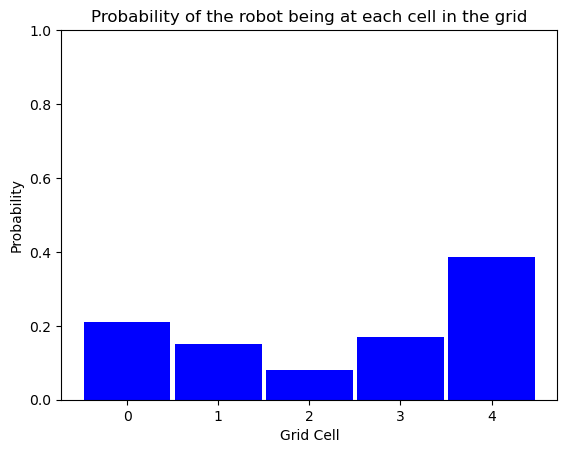

In [98]:
# given initial variables
p=[0.2, 0.2, 0.2, 0.2, 0.2]
# the color of each grid cell in the 1D world
world=['green', 'red', 'red', 'green', 'green']
# Z, the sensor reading ('red' or 'green')
measurements = ['red', 'green']
pHit = 0.6
pMiss = 0.2

motions = [1,1]
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

# You are given the complete sense function
def sense(p, Z):
    ''' Takes in a current probability distribution, p, and a sensor reading, Z.
        Returns a *normalized* distribution after the sensor measurement has been made, q.
        This should be accurate whether Z is 'red' or 'green'. '''
    q=[]
    # loop through all grid cells
    for i in range(len(p)):
        # check if the sensor reading is equal to the color of the grid cell
        # if so, hit = 1
        # if not, hit = 0
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
        
    # sum up all the components
    s = 0
    for i in range(len(q)):
        s += q[i]

    # divide all elements of q by the sum to normalize
    for i in range(len(p)):
        q[i] = q[i] / s
    return q


# The complete move function
def move(p, U):
    q=[]
    # iterate through all values in p
    for i in range(len(p)):
        # use the modulo operator to find the new location for a p value
        # this finds an index that is shifted by the correct amount
        index = (i-U) % len(p)
        nextIndex = (index+1) % len(p)
        prevIndex = (index-1) % len(p)
        s = pExact * p[index]
        s = s + pOvershoot  * p[nextIndex]
        s = s + pUndershoot * p[prevIndex]
        # append the correct, modified value of p to q
        q.append(s)
    return q


## TODO: Compute the posterior distribution if the robot first senses red, then moves 
## right one, then senses green, then moves right again, starting with a uniform prior distribution.
for k in range(len(measurements)):
    p = sense(p,measurements[k])
    p = move(p,motions[k])

## print/display that distribution
print(p)
display_map(p)

### Clarification about Entropy

The video mentions that entropy will go down after the update step and that entropy will go up after the measurement step. 

In general, **entropy measures the amount of uncertainty**. Since the update step increases uncertainty, then entropy should increase. The measurement step decreases uncertainty, so entropy should decrease.

Let's look at our current example where the robot could be at five different positions. The maximum uncertainty occurs when all positions have equal probabilities  $[0.2, 0.2, 0.2, 0.2, 0.2]$ 

Following the formula $$\text{Entropy} = \Sigma  (-p \times log(p))$$we get $$-5 \times (.2)\times log(0.2) = 0.699$$

Taking a measurement should decrease uncertainty and thus decrease entropy. Let's say after taking a measurement, the probabilities become <span class="mathquill">[0.05, 0.05, 0.05, 0.8, 0.05]</span>. Now the entropy decreased to 0.338. Hence a measurement step should decrease entropy whereas an update step should increase entropy.

### 엔트로피에 대한 설명

동영상에서는 업데이트 단계 후에 엔트로피가 감소하고 측정 단계 후에 엔트로피가 증가한다고 언급합니다.

일반적으로 **엔트로피는 불확실성의 양을 측정합니다**. 업데이트 단계가 불확실성을 증가시키므로 엔트로피가 증가해야 합니다. 측정 단계는 불확실성을 감소시키므로 엔트로피가 감소해야 합니다.

로봇이 다섯 가지 다른 위치에 있을 수 있는 현재의 예를 살펴보겠습니다. 최대 불확실성은 모든 위치가 동일한 확률을 가질 때 발생합니다. $[0.2, 0.2, 0.2, 0.2, 0.2]$

공식 $$\text{엔트로피} = \Sigma (-p \times log(p))$$에 따르면 $$-5 \times (.2)\times log(0.2) = 0.699$$가 됩니다.

측정을 수행하면 불확실성이 감소하고 따라서 엔트로피도 감소합니다. 측정을 한 후 확률이 <span class="mathquill">[0.05, 0.05, 0.05, 0.8, 0.05]</span>가 되었다고 가정해 보겠습니다. 이제 엔트로피는 0.338로 감소했습니다. 따라서 측정 단계는 엔트로피를 감소시키고 업데이트 단계는 엔트로피를 증가시켜야 합니다.